In [1]:
import sys
sys.path.insert(1, '/home/patryk_mscwrona/repos') # inserting a library's directory

from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np
import matplotlib.pyplot as plt

from river import optim
from river import linear_model
from river import forest
from river import tree
from river import ensemble
from river import preprocessing
from river import metrics
from river import dummy
from river import utils
from river import drift
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (18, 18),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

from Fleuve.master import stream_miner_master
from Fleuve.master import evaluator_master
from Fleuve.master import predictor_master
from Fleuve.master import drift_detector_master

# initialize credit card input
from Fleuve.evaluation.initialize_scripts.initialize_credit_card import InitializeCC
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA1
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA2
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA3
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA4
from Fleuve.evaluation.initialize_scripts.initialize_hyperplane import InitializeH
from Fleuve.evaluation.initialize_scripts.initialize_credit_card_delayed import InitializeCCD

ModuleNotFoundError: No module named 'Fleuve'

In [2]:
init = InitializeCC()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/14 21:25:08 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


# Stream Miner - Case 1

In [3]:
# # # models
# # model1 = dummy.NoChangeClassifier()
# # model2 = tree.ExtremelyFastDecisionTreeClassifier(max_depth = 50)
# # model3 = forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 50)
# # model4 = tree.HoeffdingTreeClassifier(max_depth = 50)

# # # metrics
# # m1 = utils.Rolling(metrics.Accuracy(), 20000)
# # m2 = utils.Rolling(metrics.BalancedAccuracy(), 20000)
# # m3 = utils.Rolling(metrics.F1(), 20000)
# # m4 = utils.Rolling(metrics.CohenKappa(), 20000)
# # #---
# # m5 = utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 30))
# # m6 = utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 30))
# # m7 = utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 30))
# # m8 = utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 30))

# #SET TASK
# task = {"cluster-9e14-w-0": {"models": [dummy.NoChangeClassifier(), 
#                                         tree.ExtremelyFastDecisionTreeClassifier(max_depth = 50), 
#                                         forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 50), 
#                                         tree.HoeffdingTreeClassifier(max_depth = 50)] , 
#                              "min_update_freq_s" : 120, 
#                              "min_training_instances": 100000}, 
#         "cluster-9e14-w-1" : {"models": [dummy.NoChangeClassifier(), 
#                                         tree.ExtremelyFastDecisionTreeClassifier(max_depth = 50), 
#                                         forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 50), 
#                                         tree.HoeffdingTreeClassifier(max_depth = 50)] }, 
#         'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
#        'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
#                         utils.Rolling(metrics.BalancedAccuracy(), 10000), 
#                         utils.Rolling(metrics.F1(), 10000), 
#                         utils.Rolling(metrics.CohenKappa(), 10000), 
#                         utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 30)), 
#                         utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 30)), 
#                         utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 30)), 
#                        utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 30))]}
# #DATA COLS
# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

# sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [3]:
# models
model1 = dummy.NoChangeClassifier()
model2 = tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20)
model3 = forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20)
model4 = tree.HoeffdingTreeClassifier(max_depth = 20)

# metrics
m1 = utils.Rolling(metrics.Accuracy(), 10000)
m2 = utils.Rolling(metrics.BalancedAccuracy(), 10000)
m3 = utils.Rolling(metrics.F1(), 10000)
m4 = utils.Rolling(metrics.CohenKappa(), 10000)
#---
m5 = utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20))
m6 = utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20))
m7 = utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20))
m8 = utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))

#SET TASK
task = {"cluster-9e14-w-0": {"models": [model1, model2, model3, model4] }, 
        "cluster-9e14-w-1" : {"models": [] }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [m1, m2, m3, m4, m5, m6, m7, m8]}
#DATA COLS
data_cols = ['V' + str(i) for i in range(1,29)]
data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [4]:
sm.transform_and_collect(sdf, "/user/hdfs/evaluation/sm/case1", "/user/hdfs/evaluation/sm/case1/chk")

23/06/14 21:28:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/14 21:28:36 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/14 21:39:23 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 647332 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
Keyboard

KeyboardInterrupt: 

In [42]:
output_schema = sm.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case1")
pdf = df.toPandas()

In [43]:
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

(146494, 44)

In [45]:
np.max(pdf.training_time) # seconds of training

638.16565

In [30]:
pdf = pdf[pdf["n"] <= 100000]

In [11]:
pdf.head()

,training_time,n,hostname,hash,model_name,prediction,R_Accuracy,R_BalancedAccuracy,R_F1,R_CohenKappa,...,model_name_4,prediction_4,R_Accuracy_4,R_BalancedAccuracy_4,R_F1_4,R_CohenKappa_4,TR_Accuracy_4,TR_BalancedAccuracy_4,TR_F1_4,TR_CohenKappa_4
0,0.028120,1,cluster-9e14-w-0,z179rdxdswabt9ma,NoChangeClassifier,0.0,0.000000,0.000000,0.0,0.0,...,HoeffdingTreeClassifier,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.029999,2,cluster-9e14-w-0,z179rdxdswabt9ma,NoChangeClassifier,0.0,0.500000,0.250000,0.0,0.0,...,HoeffdingTreeClassifier,0.0,0.500000,0.250000,0.0,0.0,0.500000,0.250000,0.0,0.0
2,0.039885,3,cluster-9e14-w-0,z179rdxdswabt9ma,NoChangeClassifier,0.0,0.666667,0.333333,0.0,0.0,...,HoeffdingTreeClassifier,0.0,0.666667,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0
3,0.041721,4,cluster-9e14-w-0,z179rdxdswabt9ma,NoChangeClassifier,0.0,0.750000,0.375000,0.0,0.0,...,HoeffdingTreeClassifier,0.0,0.750000,0.375000,0.0,0.0,0.750000,0.375000,0.0,0.0
4,0.043329,5,cluster-9e14-w-0,z179rdxdswabt9ma,NoChangeClassifier,0.0,0.800000,0.400000,0.0,0.0,...,HoeffdingTreeClassifier,0.0,0.800000,0.400000,0.0,0.0,0.800000,0.400000,0.0,0.0


In [7]:
np.unique(pdf.prediction, return_counts = True)

(array([0., 1.]), array([146212,    282]))

In [8]:
np.unique(pdf.prediction_2, return_counts = True)

(array([0., 1.]), array([146151,    343]))

In [9]:
np.unique(pdf.prediction_3, return_counts = True)

(array([0., 1.]), array([146290,    204]))

In [10]:
np.unique(pdf.prediction_4, return_counts = True)

(array([0., 1.]), array([146354,    140]))

In [12]:
pdf.shape

(146494, 44)

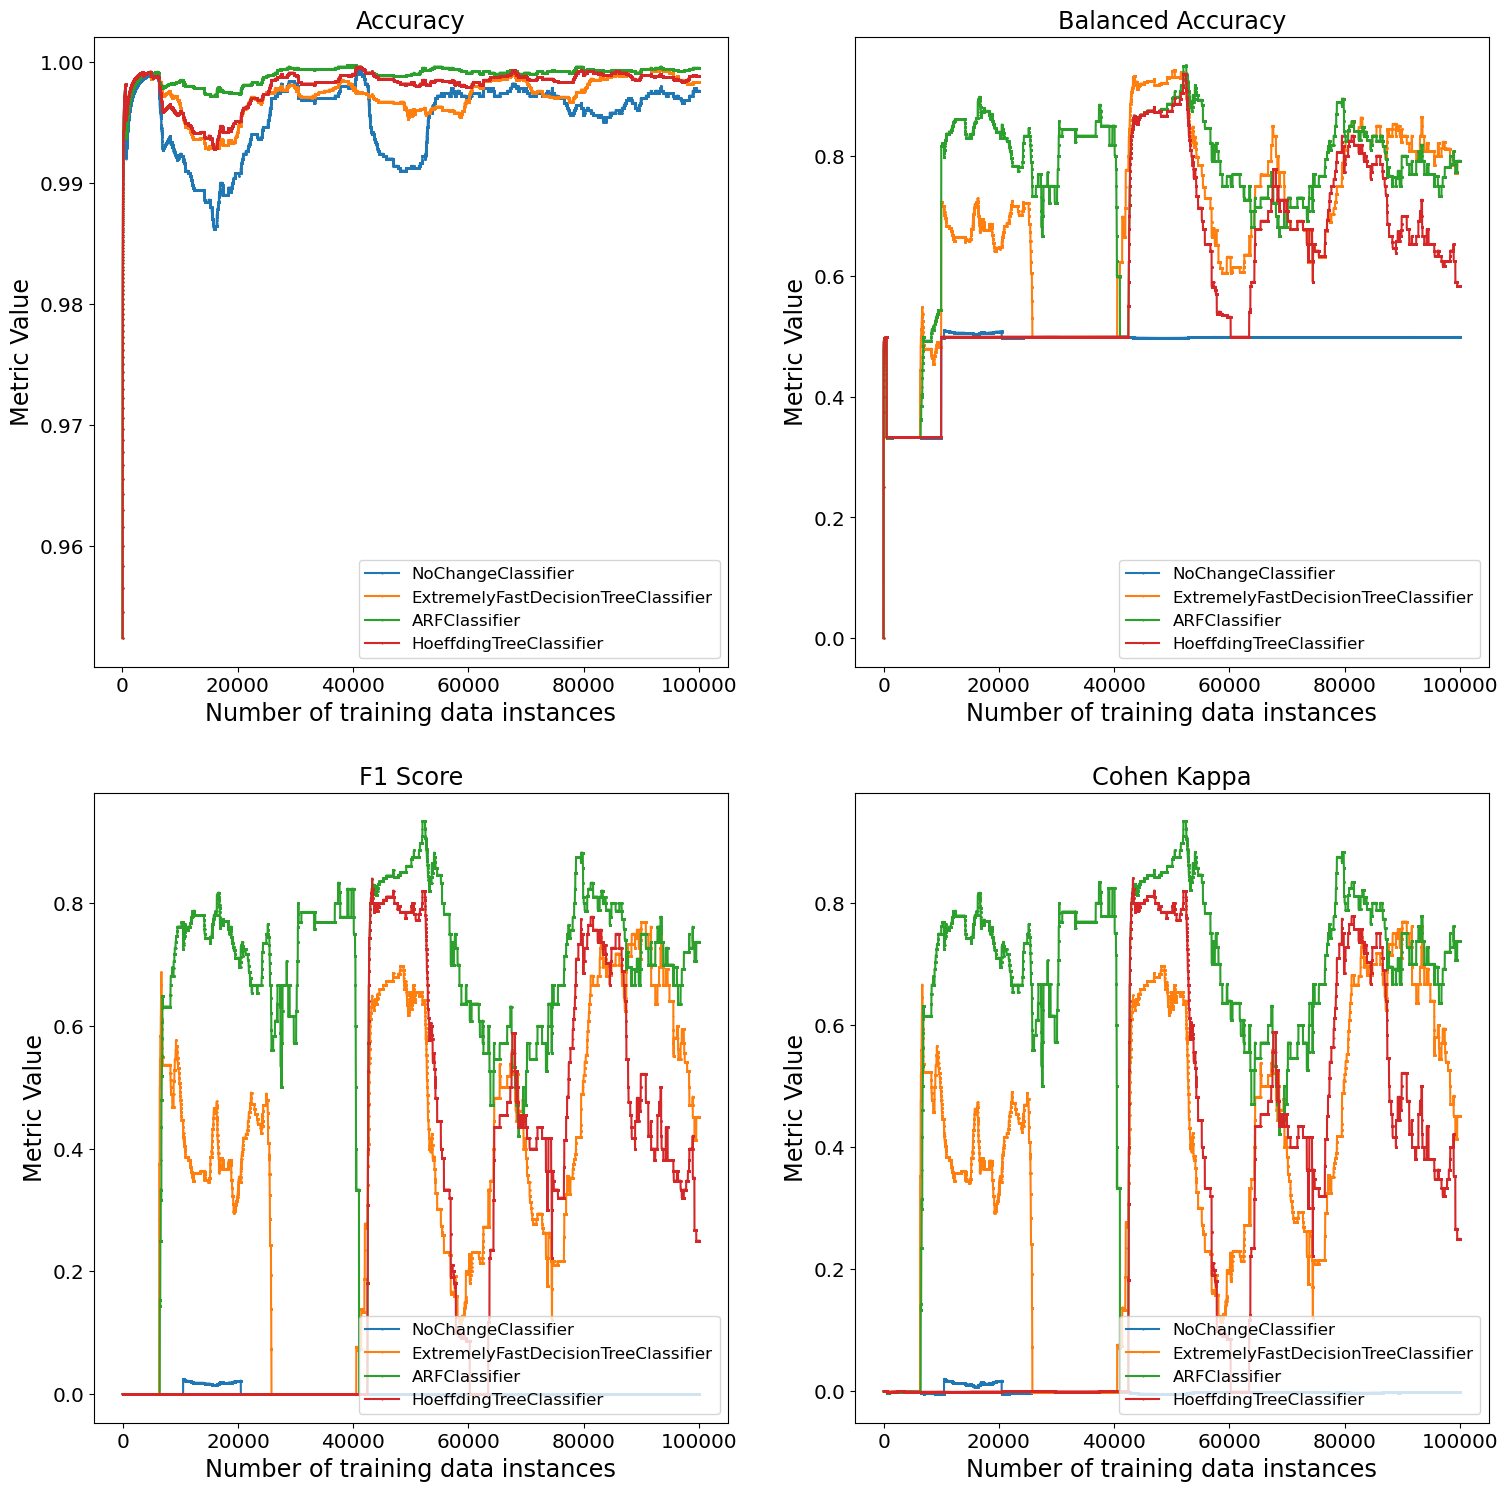

In [39]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["R_Accuracy"] > 0.95].n, pdf[pdf["R_Accuracy"] > 0.95].R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_2"] > 0.95].n, pdf[pdf["R_Accuracy_2"] > 0.95].R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_3"] > 0.95].n, pdf[pdf["R_Accuracy_3"] > 0.95].R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_4"] > 0.95].n, pdf[pdf["R_Accuracy_4"] > 0.95].R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

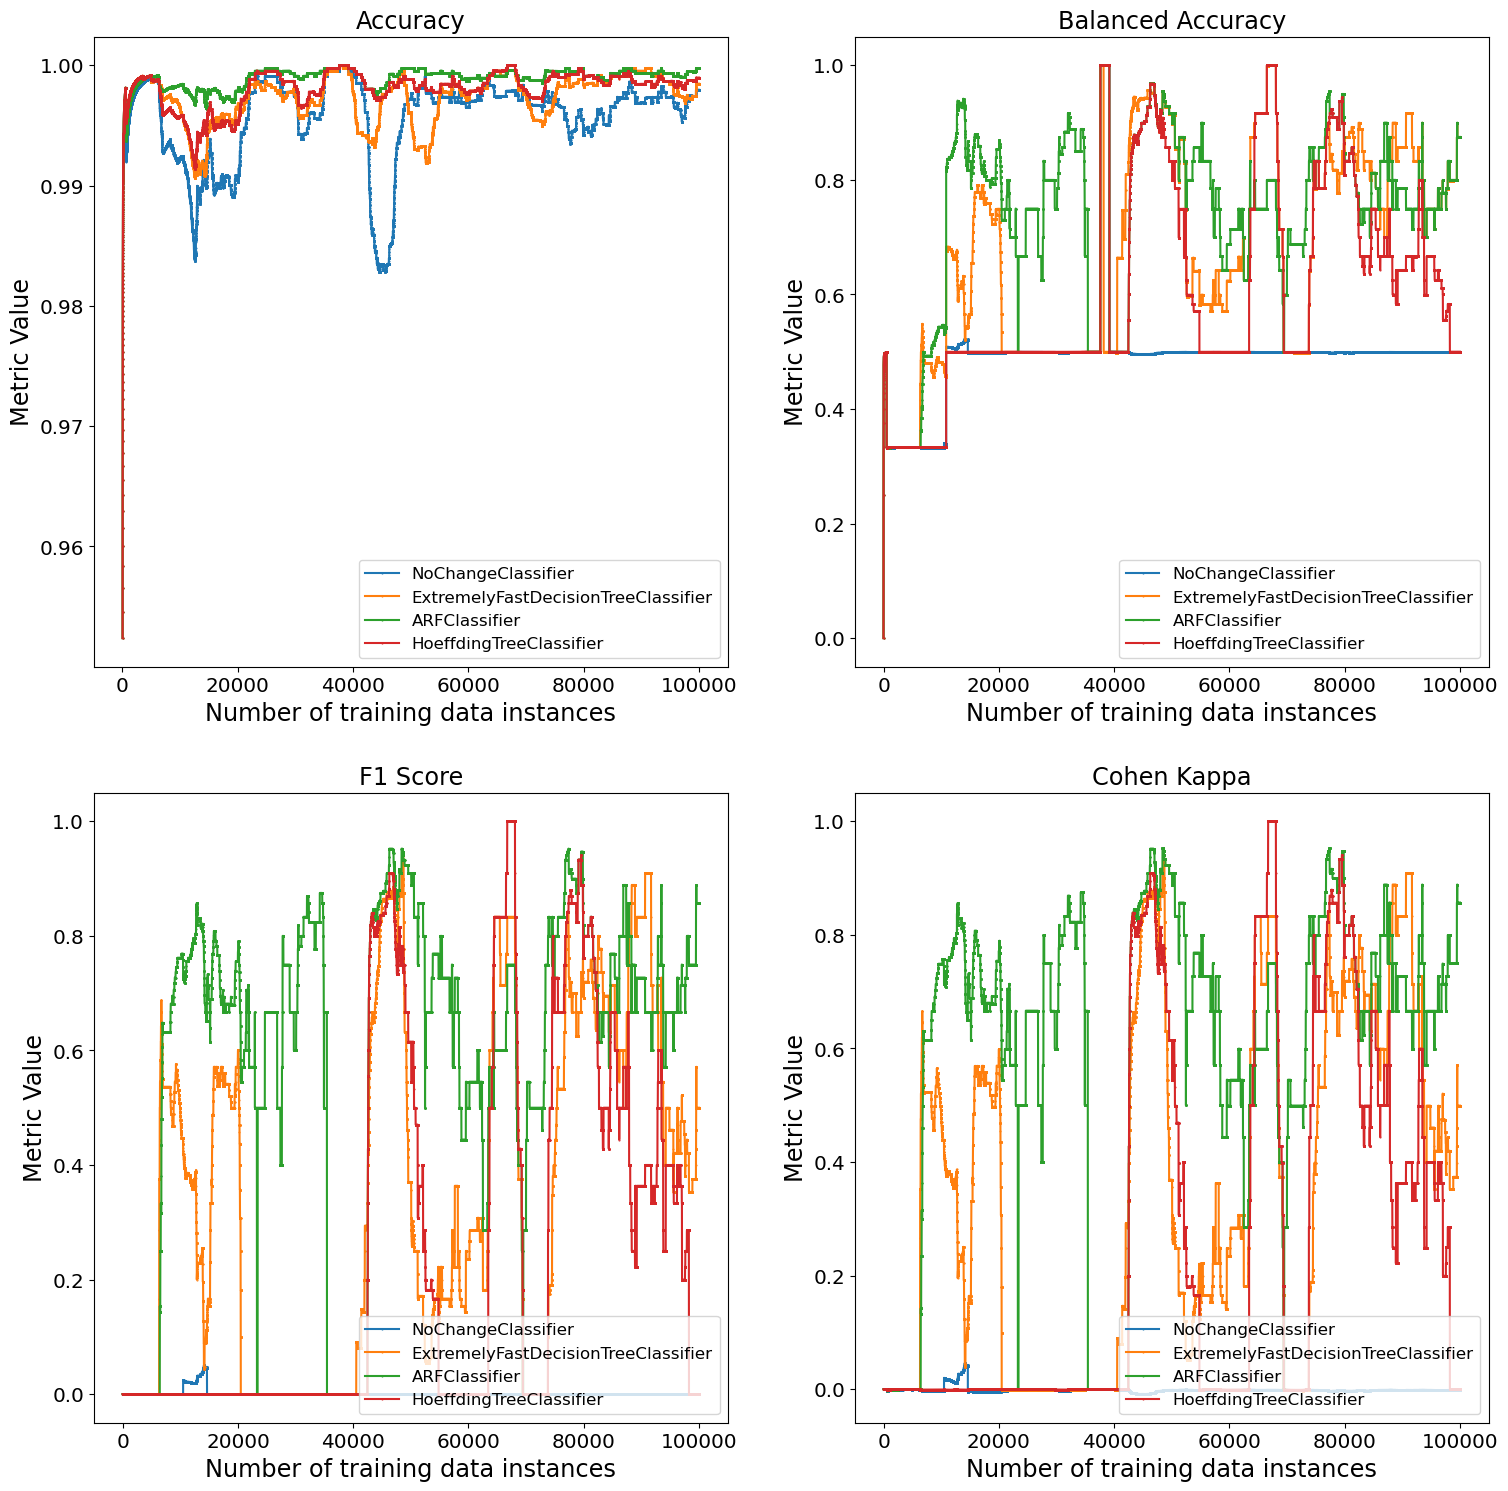

In [41]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["TR_Accuracy"] > 0.95].n, pdf[pdf["TR_Accuracy"] > 0.95].TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_2"] > 0.95].n, pdf[pdf["TR_Accuracy_2"] > 0.95].TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_3"] > 0.95].n, pdf[pdf["TR_Accuracy_3"] > 0.95].TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_4"] > 0.95].n, pdf[pdf["TR_Accuracy_4"] > 0.95].TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

# Stream Miner - Case 2

In [2]:
init = InitializeH() # loading a s
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf
# spark.stop()

23/06/22 21:28:58 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
#SET TASK
task = {"cluster-9e14-w-0": {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)] , 
                             "min_update_freq_s" : 120, 
                             "min_training_instances": 75000}, 
        "cluster-9e14-w-1" : {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)] , 
                             "min_update_freq_s" : 120, 
                             "min_training_instances": 75000 }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
                        utils.Rolling(metrics.BalancedAccuracy(), 10000), 
                        utils.Rolling(metrics.F1(), 10000), 
                        utils.Rolling(metrics.CohenKappa(), 10000), 
                        utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20)), 
                       utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))]}

In [4]:
data_cols = [field.name for field in input_schema.fields][:-1]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [5]:
output_schema = sm.output_schema

In [6]:
sm.transform_and_collect(sdf, "/user/hdfs/evaluation/sm/case2", "/user/hdfs/evaluation/sm/case2/chk")

23/06/22 21:30:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/22 21:30:36 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/22 21:45:51 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 914092 milliseconds
23/06/22 21:53:55 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 484405 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decod

KeyboardInterrupt: 

In [10]:
output_schema = sm.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case2")
pdf = df.toPandas()
pdf = pdf.sort_values(by=['n'])

print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

pdf = pdf[pdf["hash"] == "dmtxlnz2aju84ypn"]

(600000, 44)
1209.8984
(300000, 44)
746.3462


In [9]:
np.unique(pdf.hash, return_counts=True)

# NoChangeClassifier_cluster-9e14-w-0_109272.pkl

(array(['dmtxlnz2aju84ypn', 'jncpjzy686af3dok'], dtype=object),
 array([110000, 110000]))

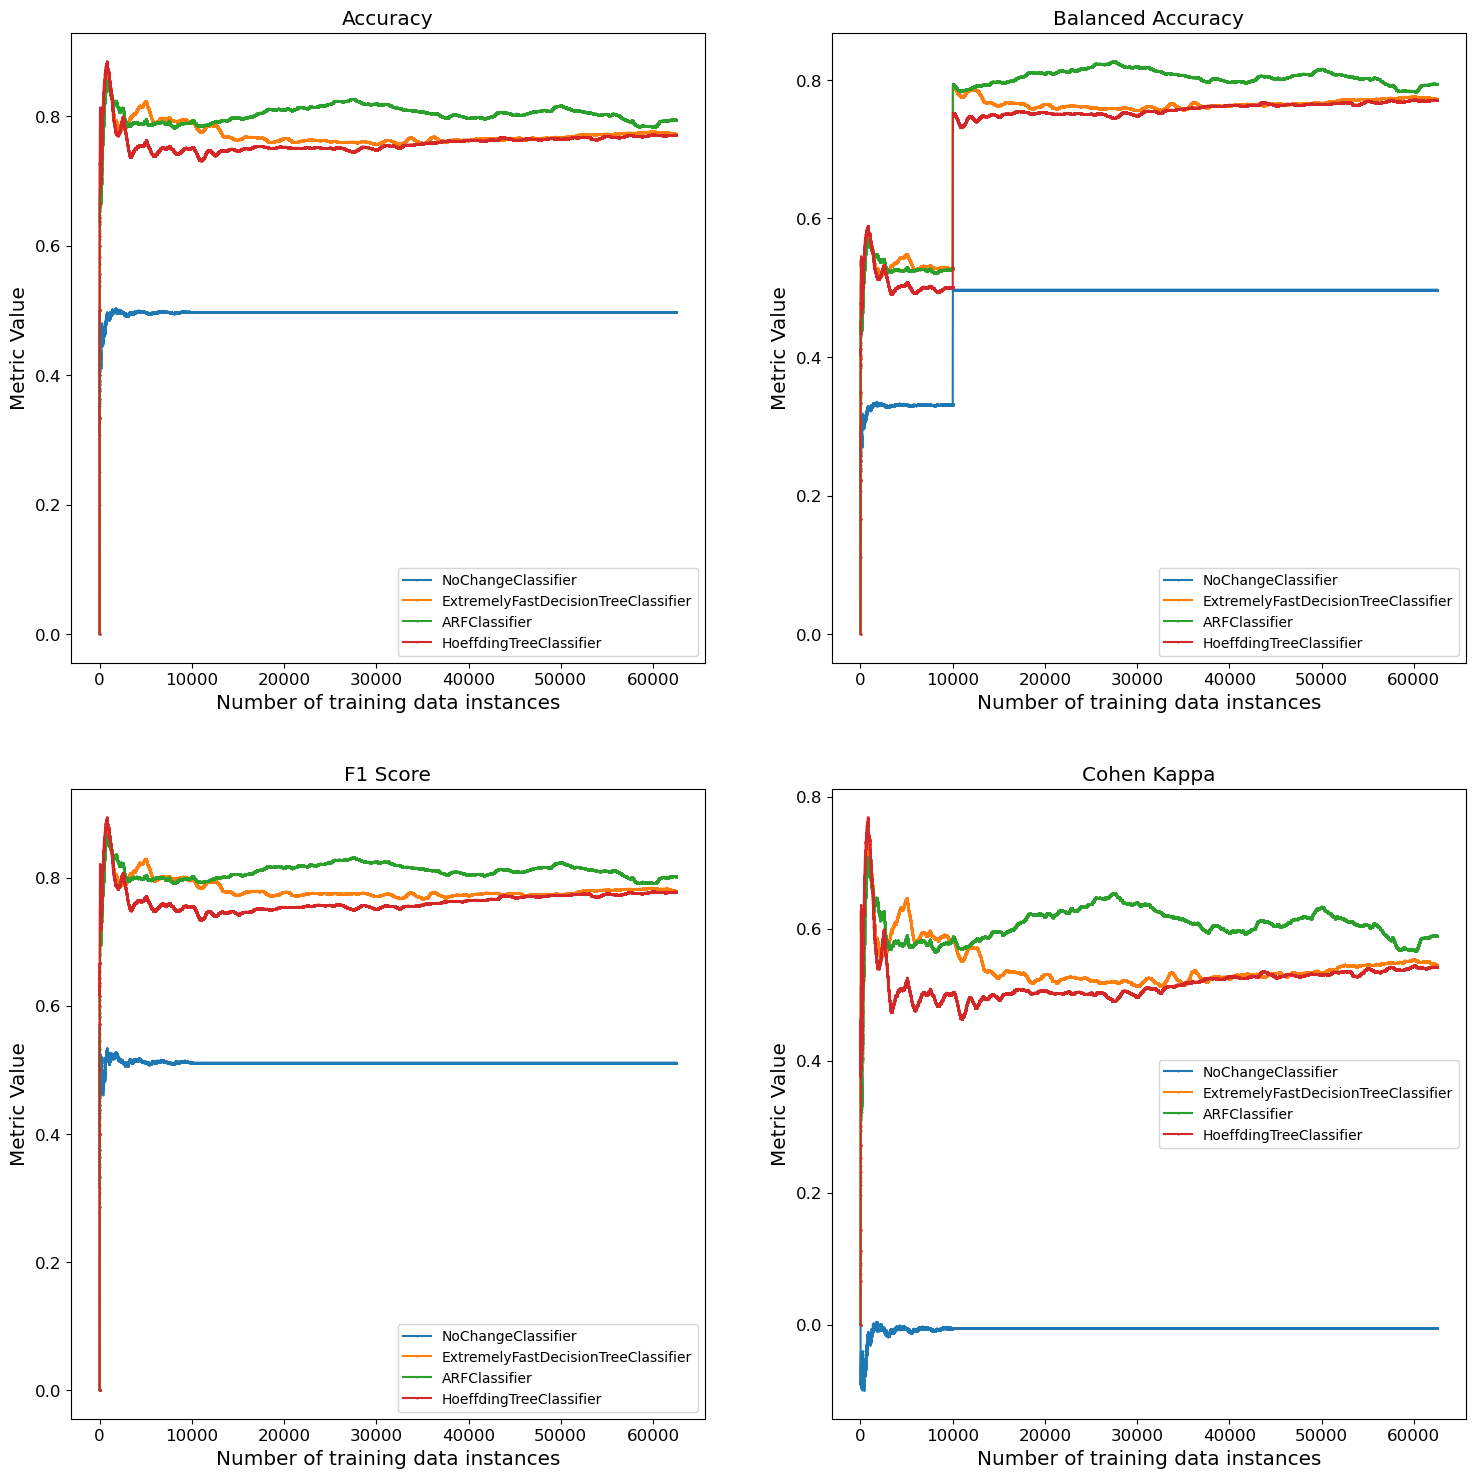

In [29]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 2 -- 

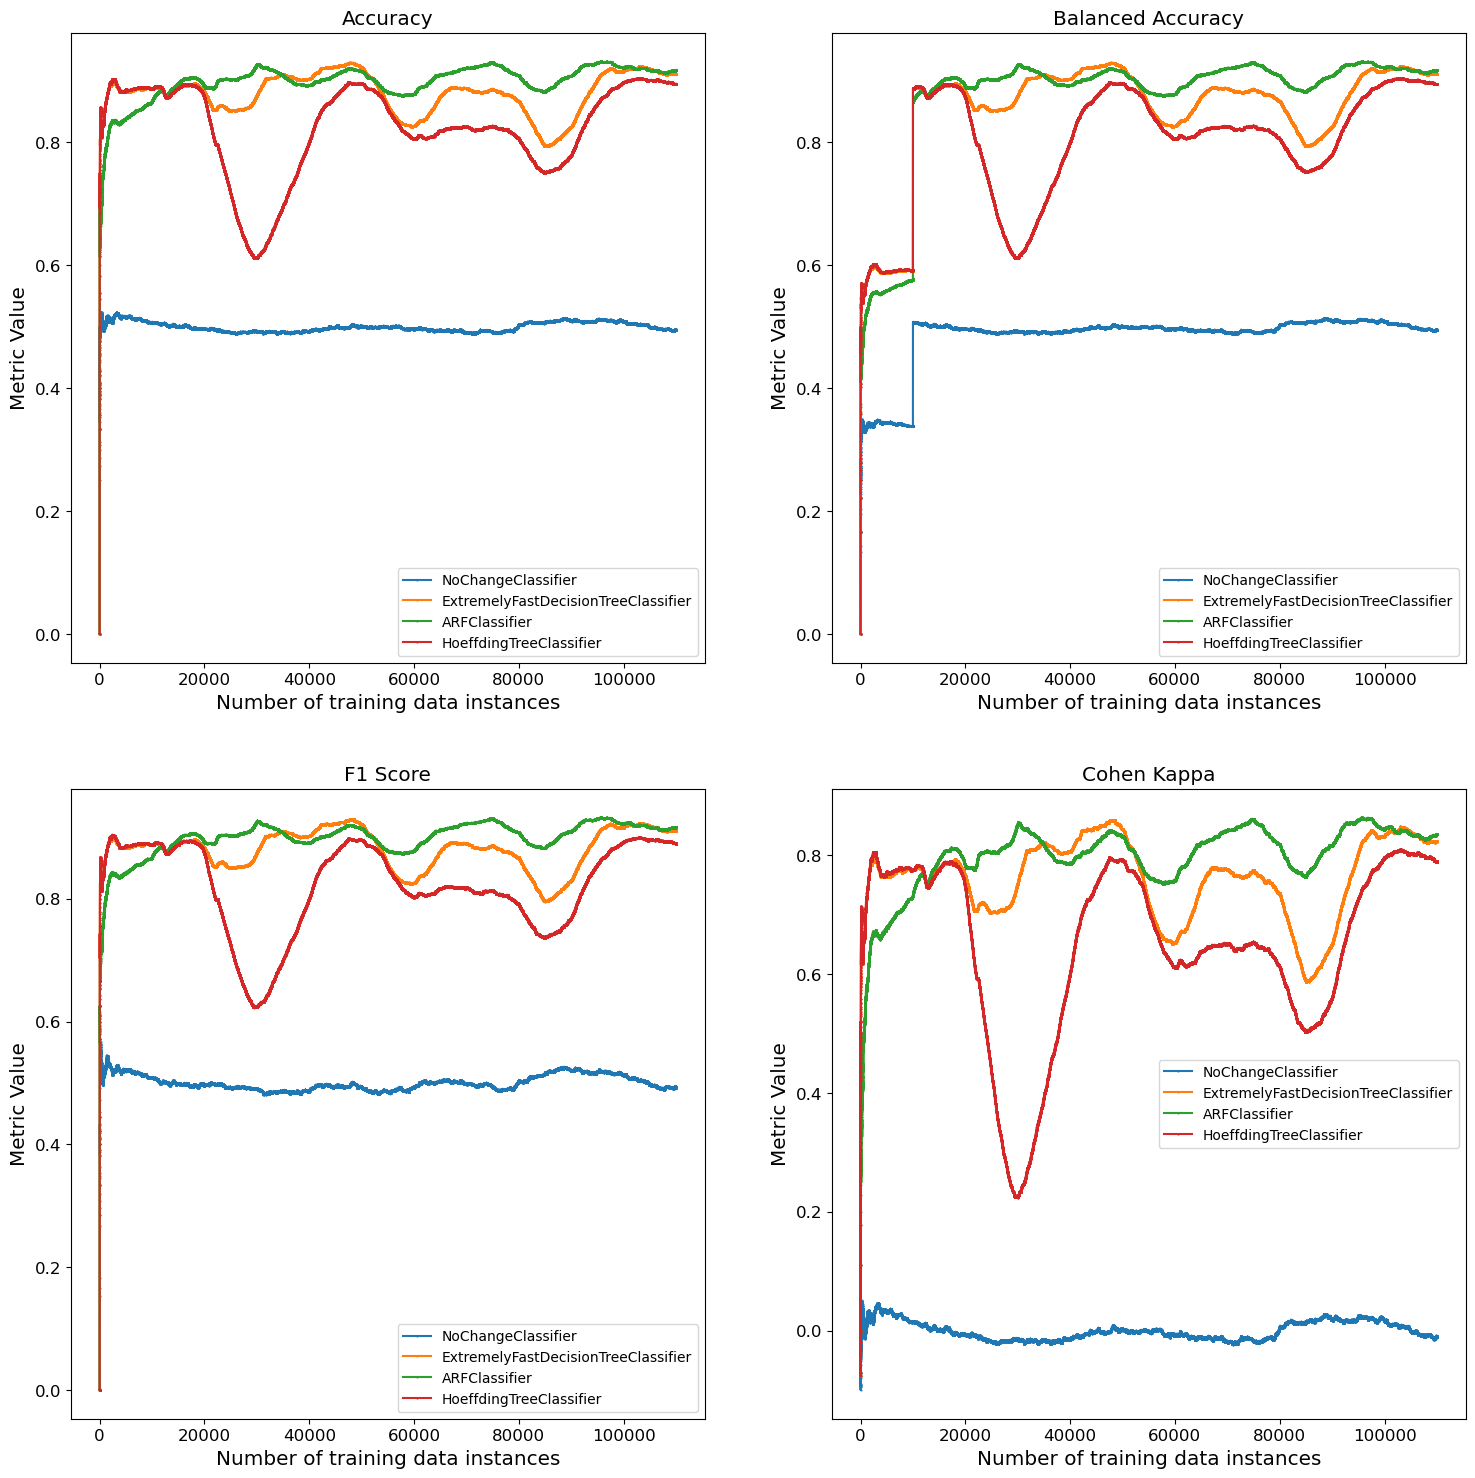

In [10]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 3 ---

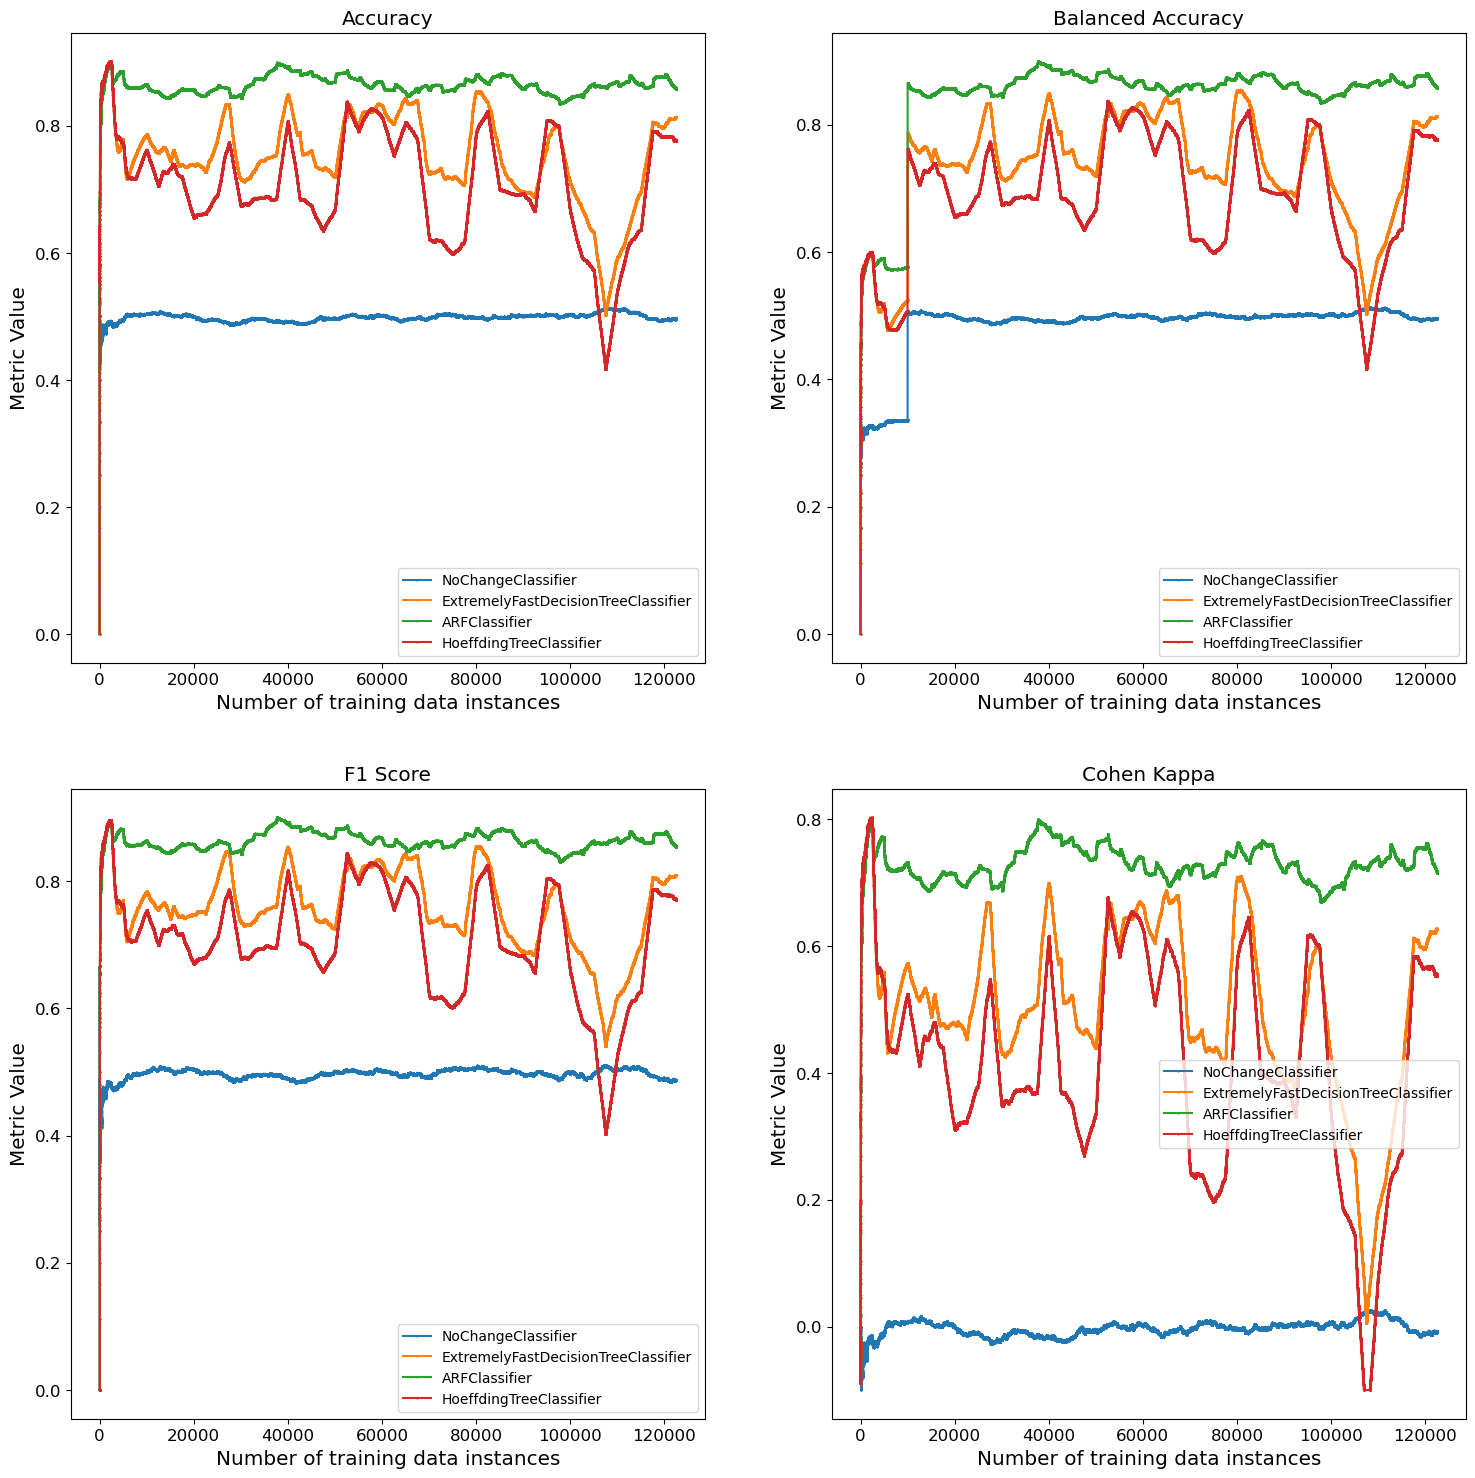

In [11]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

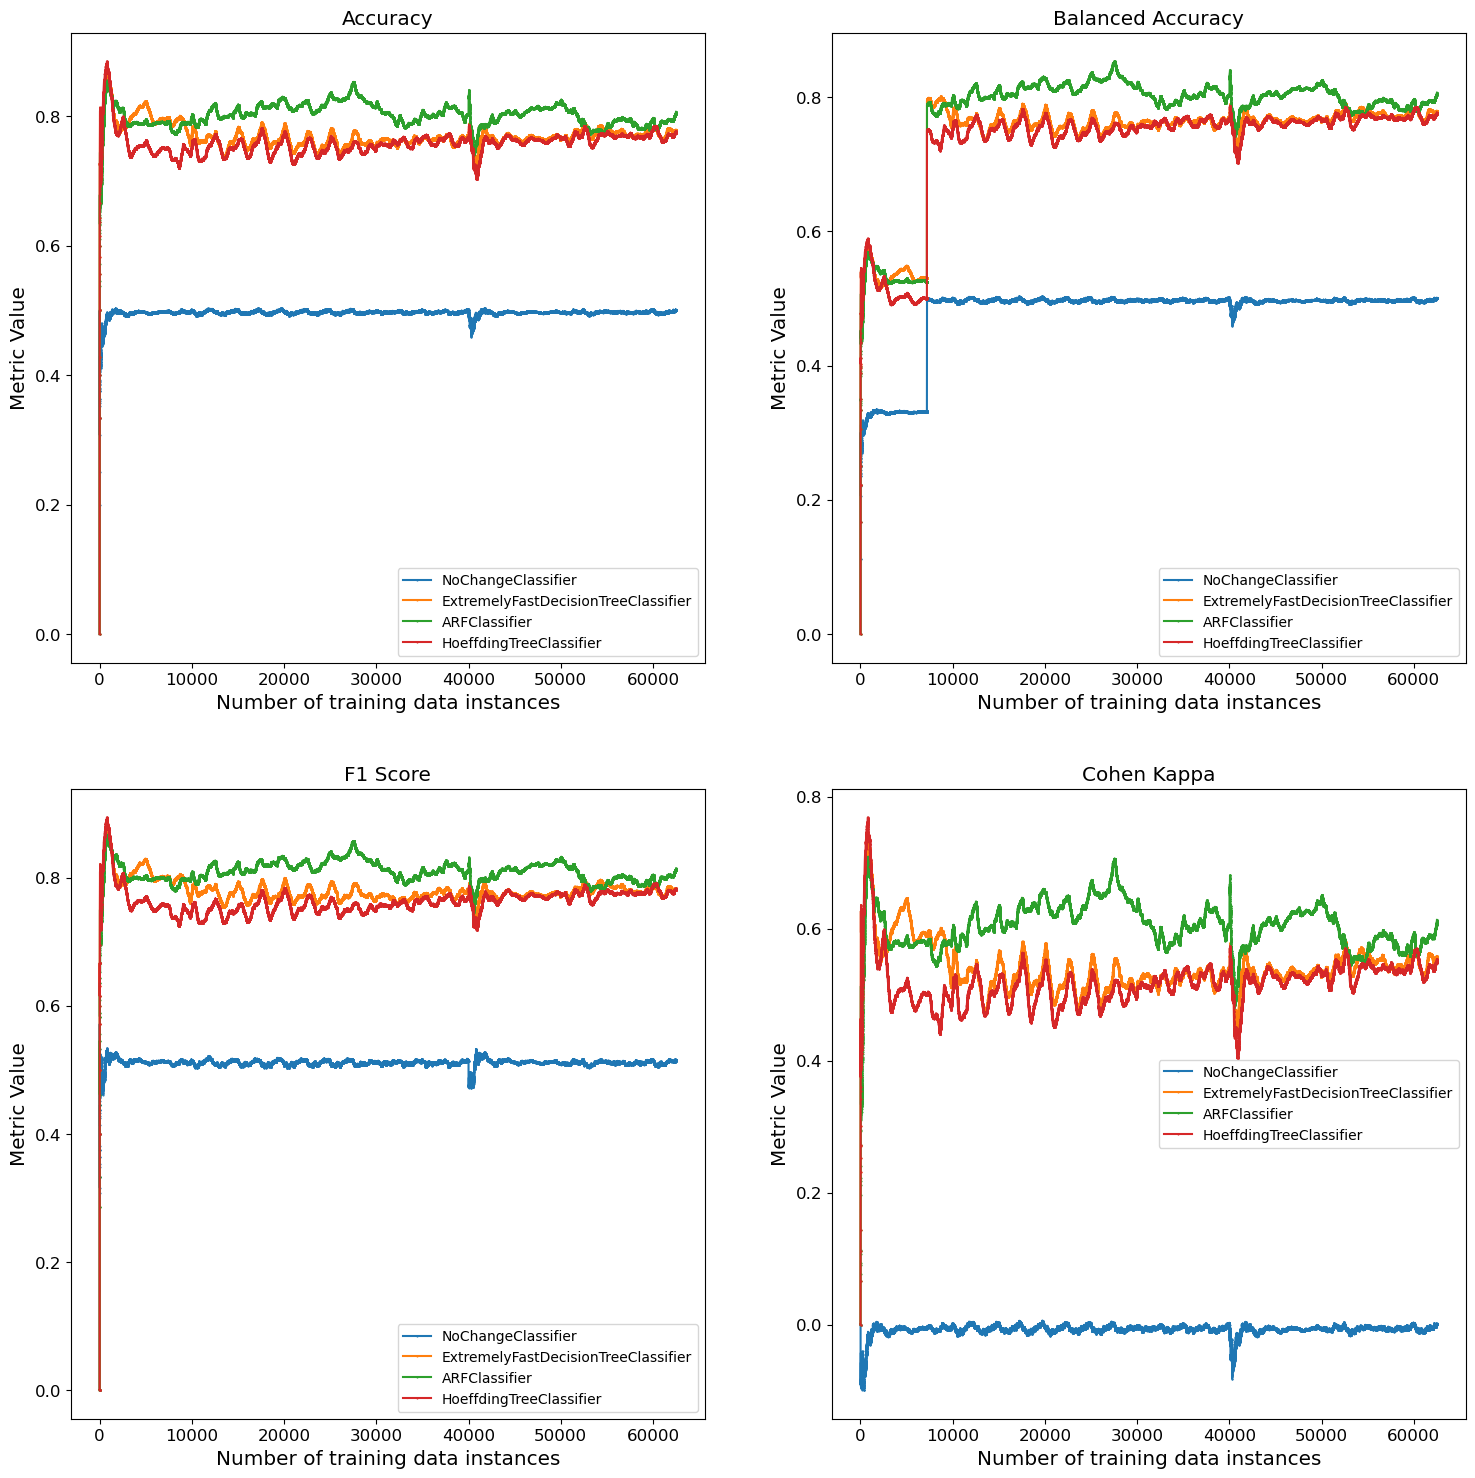

In [28]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 2 ---

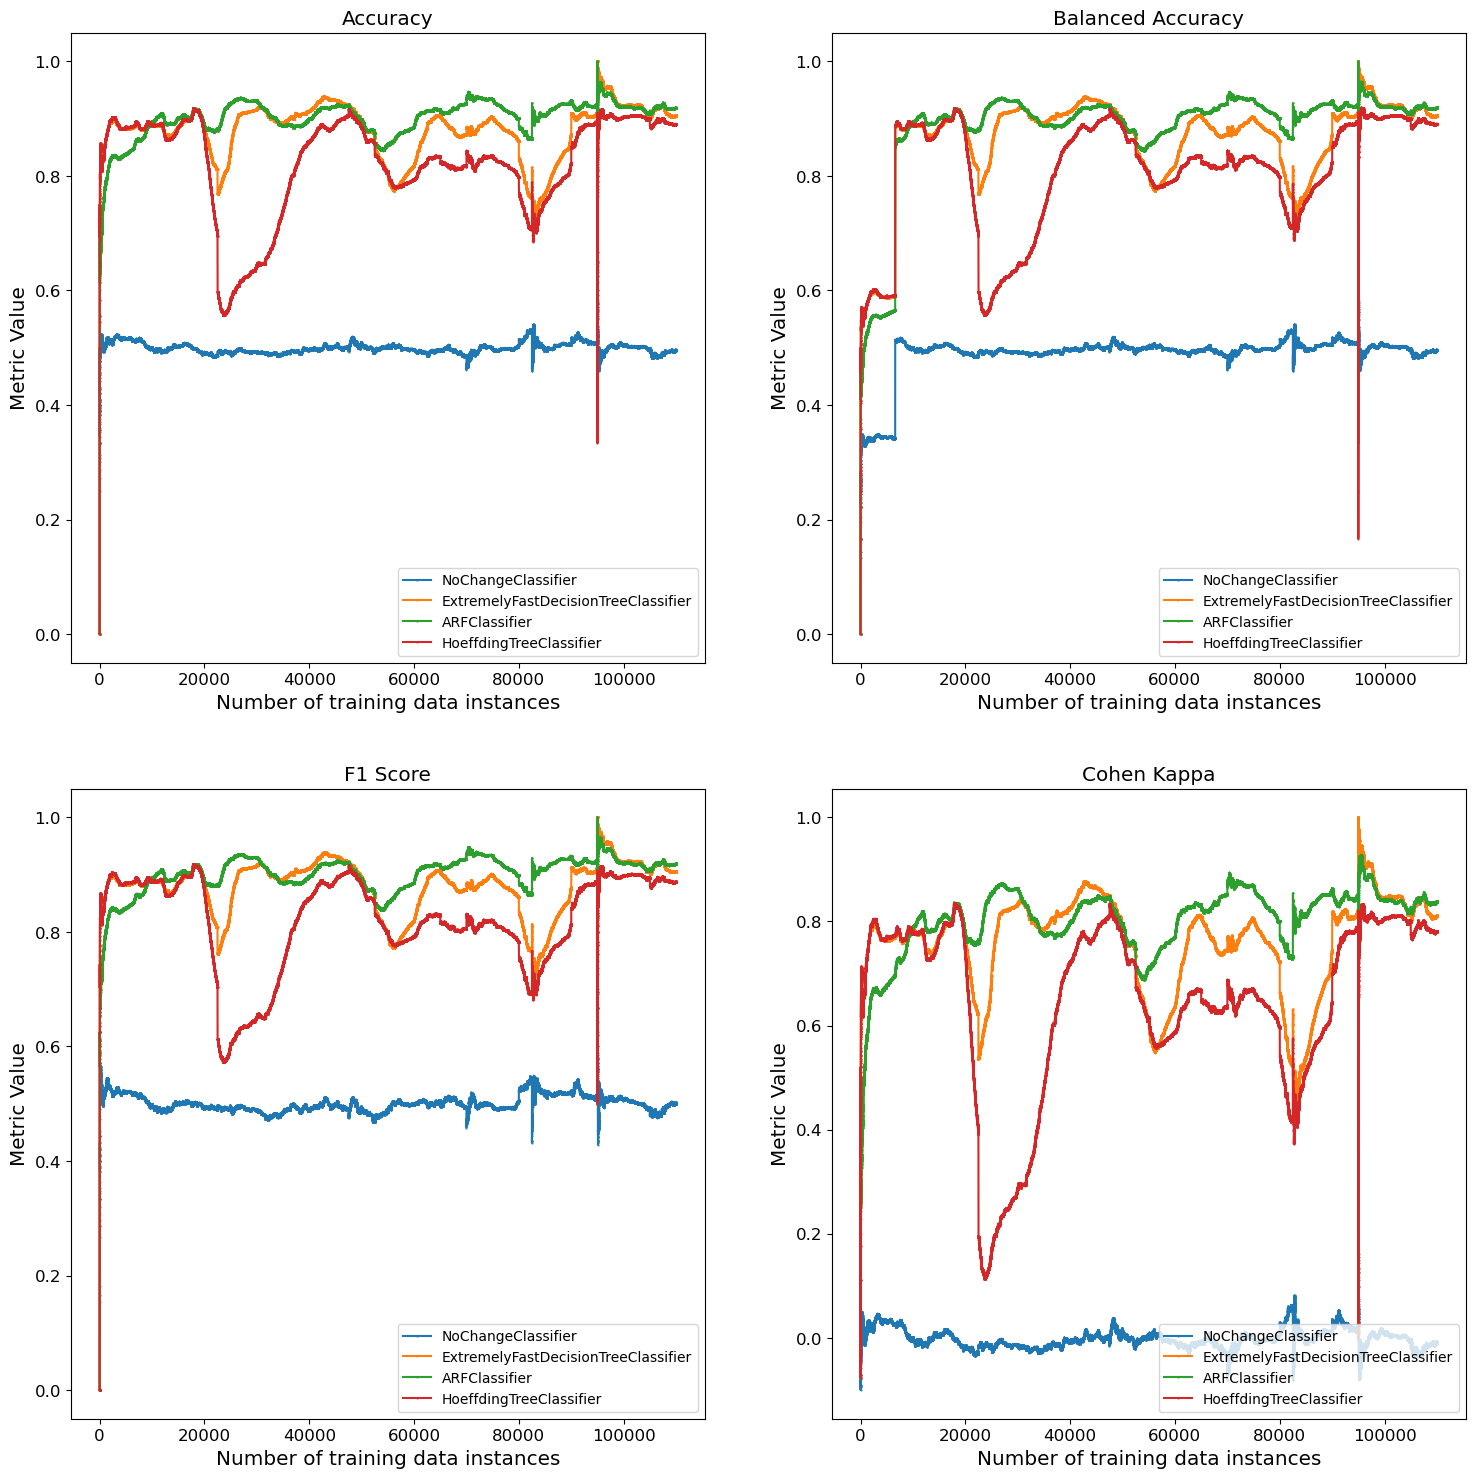

23/06/22 17:54:58 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 8665 milliseconds
23/06/22 17:55:11 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 12826 milliseconds
23/06/22 17:55:30 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 19007 milliseconds
23/06/22 17:55:48 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 17526 milliseconds
23/06/22 17:56:19 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 31544 milliseconds
23/06/22 17:57:00 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 40658 milliseconds
23/06/22 17:57:56 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigg

In [12]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 3 ---

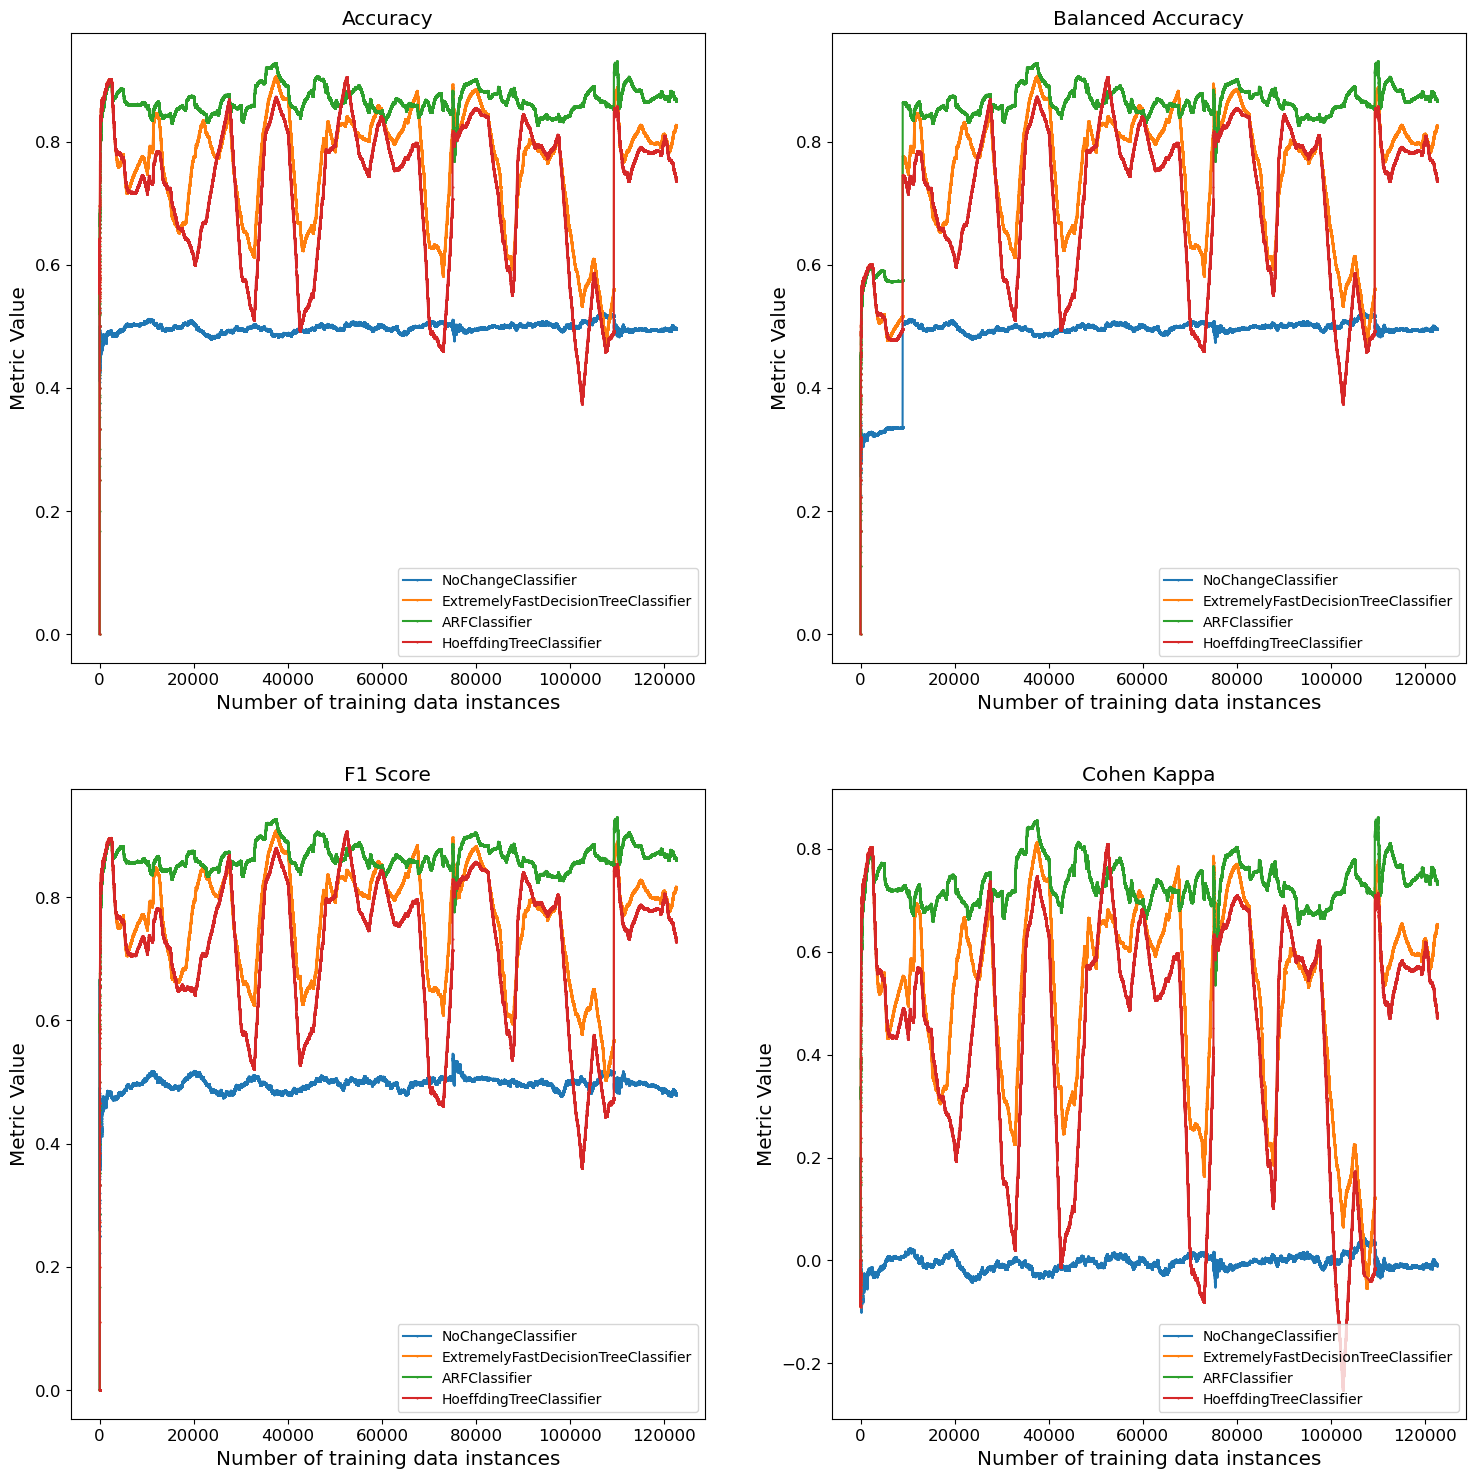

In [12]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf[pdf["R_CohenKappa"] >= -0.1].n, pdf[pdf["R_CohenKappa"] >= -0.1].TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_2"] >= -0.1].n, pdf[pdf["R_CohenKappa_2"] >= -0.1].TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_3"] >= -0.1].n, pdf[pdf["R_CohenKappa_3"] >= -0.1].TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf[pdf["R_CohenKappa_4"] >= -0.1].n, pdf[pdf["R_CohenKappa_4"] >= -0.1].TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

# Stream Miner - Case 3

In [13]:
init = InitializeA() # auxiliary function for evaluation purposes (not within the library)

spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf
# spark.stop()

23/06/22 18:54:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
23/06/22 18:54:18 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/evaluator.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/22 18:54:18 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/shared/evaluator_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/22 18:54:18 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/drift_detector.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/22 18:54:18 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/shared/drift_detector_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/22 18:54:18 WARN SparkContext: The path /home/patryk_patrykwrona

In [14]:
#SET TASK
task = {"cluster-9e14-w-0": {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)] , 
                             "min_update_freq_s" : 120, 
                             "min_training_instances": 65000}, 
        "cluster-9e14-w-1" : {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)] , 
                             "min_update_freq_s" : 120, 
                             "min_training_instances": 65000 }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
                        utils.Rolling(metrics.BalancedAccuracy(), 10000), 
                        utils.Rolling(metrics.F1(), 10000), 
                        utils.Rolling(metrics.CohenKappa(), 10000), 
                        utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20)), 
                       utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))]}

In [15]:
sdf.printSchema()

root
 |-- s: double (nullable = true)
 |-- c: double (nullable = true)
 |-- age: double (nullable = true)
 |-- e: double (nullable = true)
 |-- car: double (nullable = true)
 |-- z: double (nullable = true)
 |-- hv: double (nullable = true)
 |-- hy: double (nullable = true)
 |-- l: double (nullable = true)
 |-- Class: double (nullable = true)



In [16]:
data_cols = [field.name for field in input_schema.fields][:-1]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [17]:
output_schema = sm.output_schema
# output_schema

In [18]:
sm.transform_and_collect(sdf, "/user/hdfs/evaluation/sm/case3", "/user/hdfs/evaluation/sm/case3/chk")

23/06/22 18:55:14 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/22 18:55:19 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 5098 milliseconds
23/06/22 18:55:26 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 6363 milliseconds
23/06/22 18:55:31 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 5299 milliseconds
23/06/22 18:55:39 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 7759 milliseconds
23/06/22 18:55:50 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11254 milliseconds
23/06/22 18:56:11 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval

KeyboardInterrupt: 

In [22]:
output_schema = sm.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case3")
pdf = df.toPandas()
pdf = pdf.sort_values(by=['n'])

print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training


(200000, 44)
927.4897


In [23]:
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-1"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

# pdf = pdf[pdf["n"] <= 100000]

(200000, 44)
927.4897


In [26]:
np.unique(pdf.hash)

array(['ob2nfdz3gw47nykj'], dtype=object)

In [29]:
np.unique(pdf.R_Accuracy_2)

array([0.        , 0.07142857, 0.07692308, ..., 0.9028    , 0.9029    ,
       0.903     ], dtype=float32)

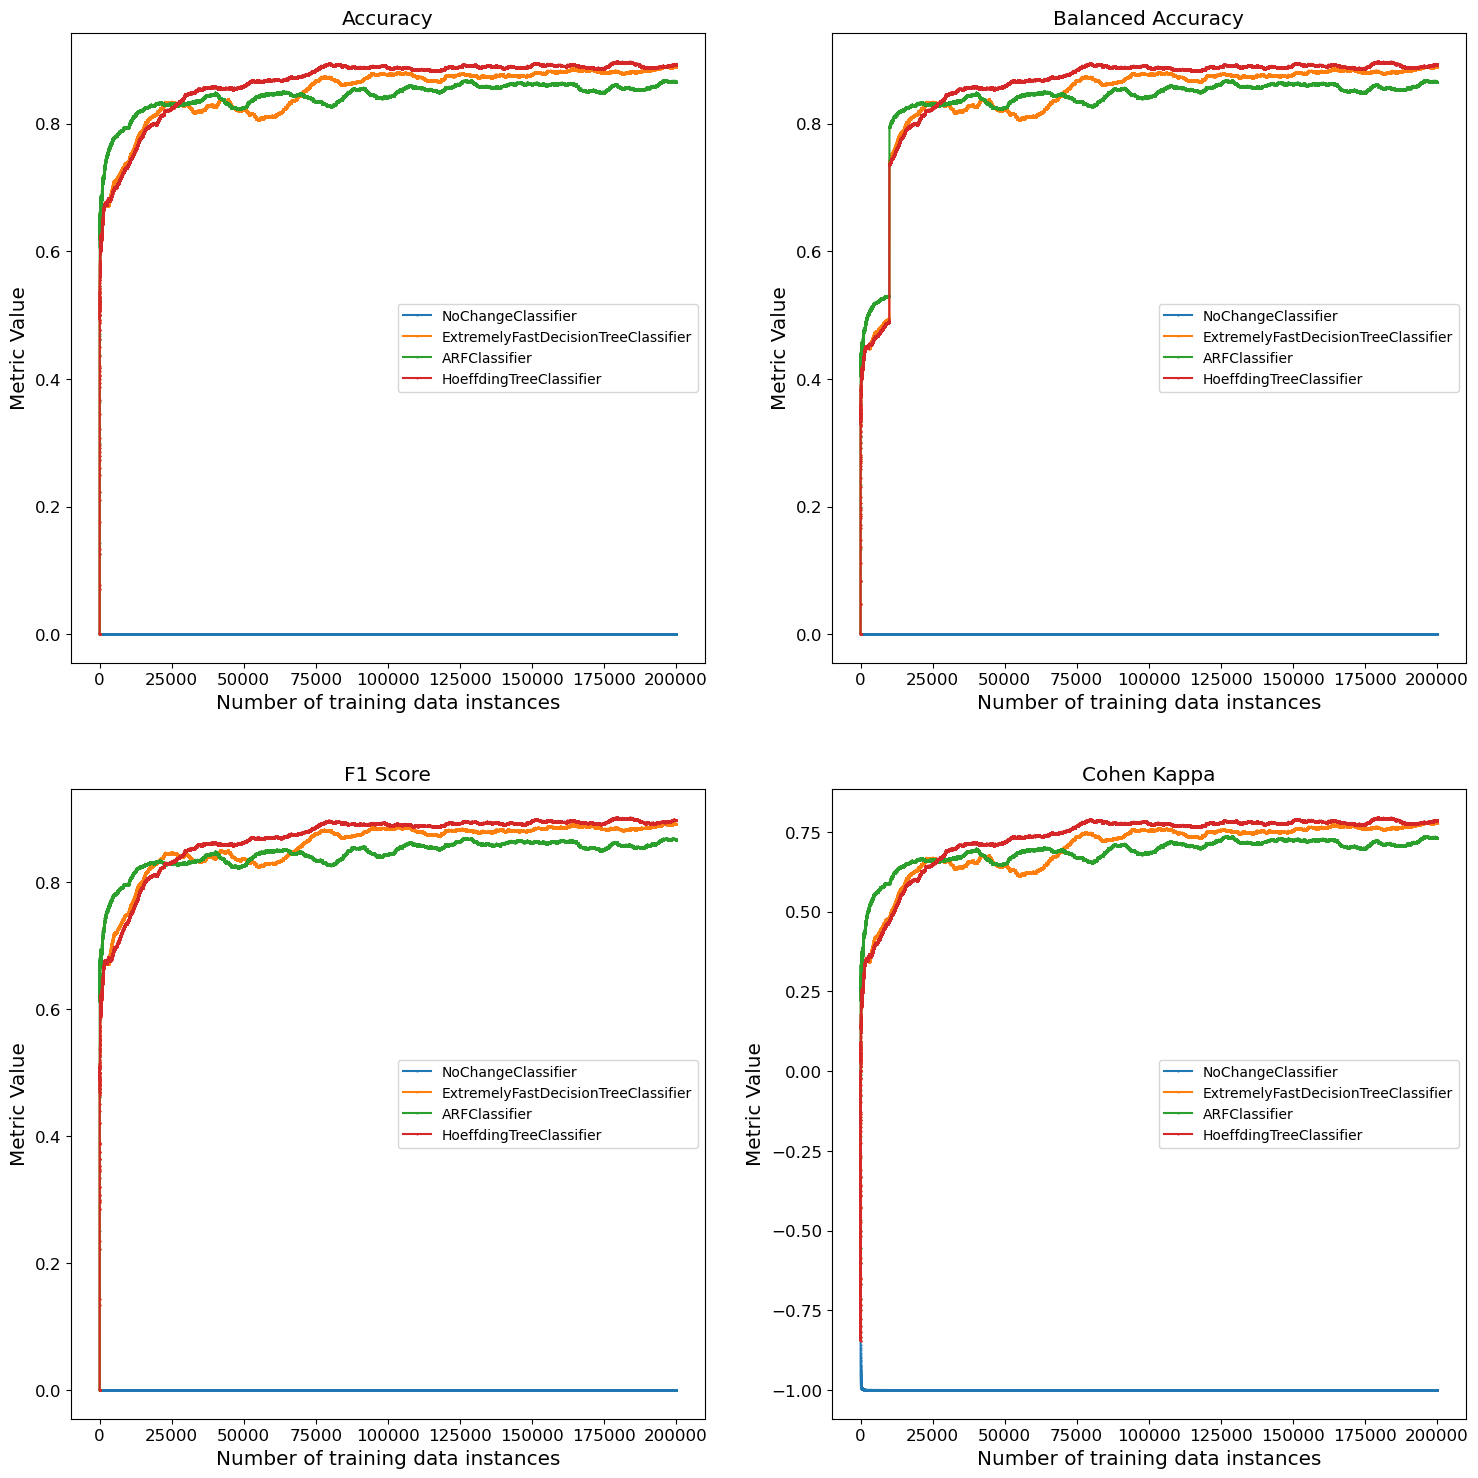

In [27]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 2--- ... above...

In [31]:
pdf.R_BalancedAccuracy_4

0         0.8724
1         0.8724
2         0.8724
3         0.8724
4         0.8724
           ...  
119995    0.8408
119996    0.8408
119997    0.8407
119998    0.8407
119999    0.8407
Name: R_BalancedAccuracy_4, Length: 60000, dtype: float32

In [20]:
np.unique(pdf.R_BalancedAccuracy_4)

array([0.        , 0.04761905, 0.08333334, ..., 0.8848    , 0.8849    ,
       0.885     ], dtype=float32)

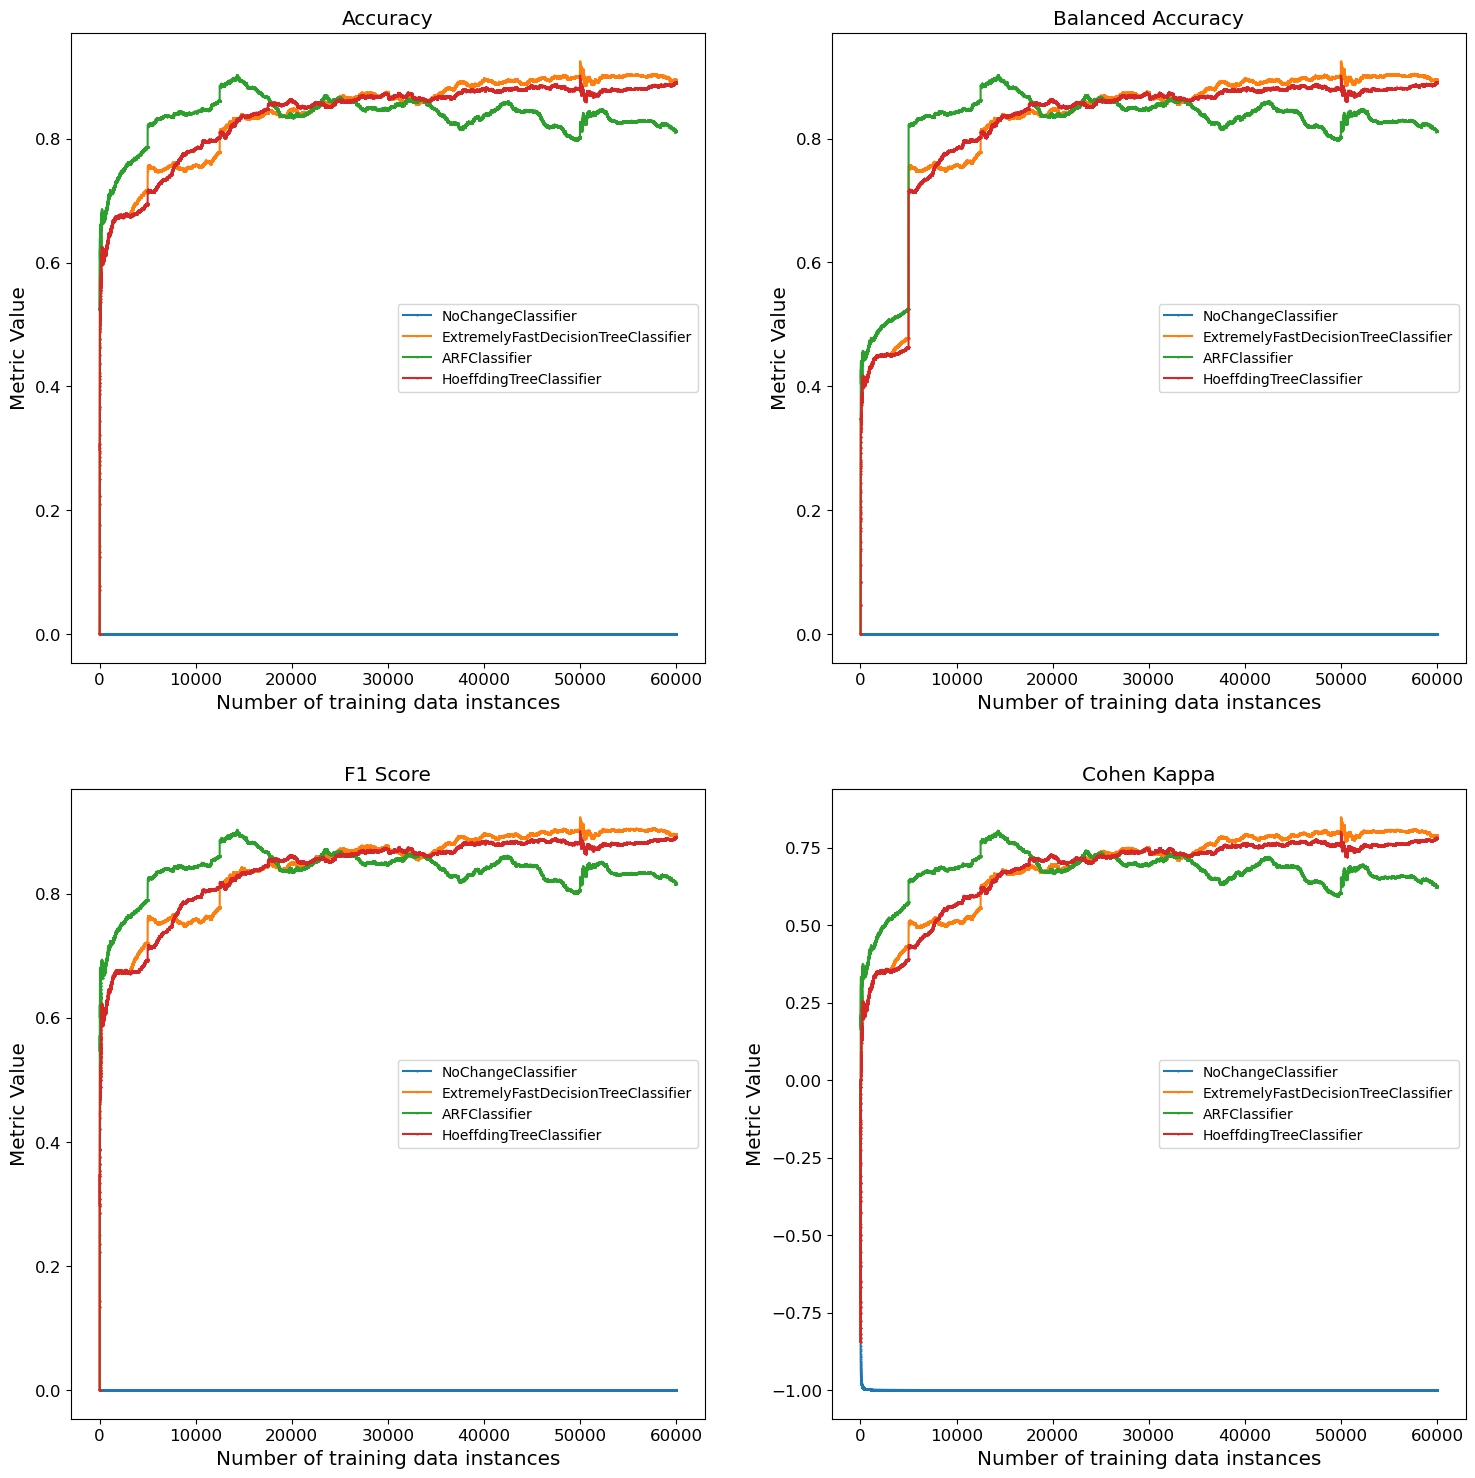

In [37]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### Attempt 2 ---

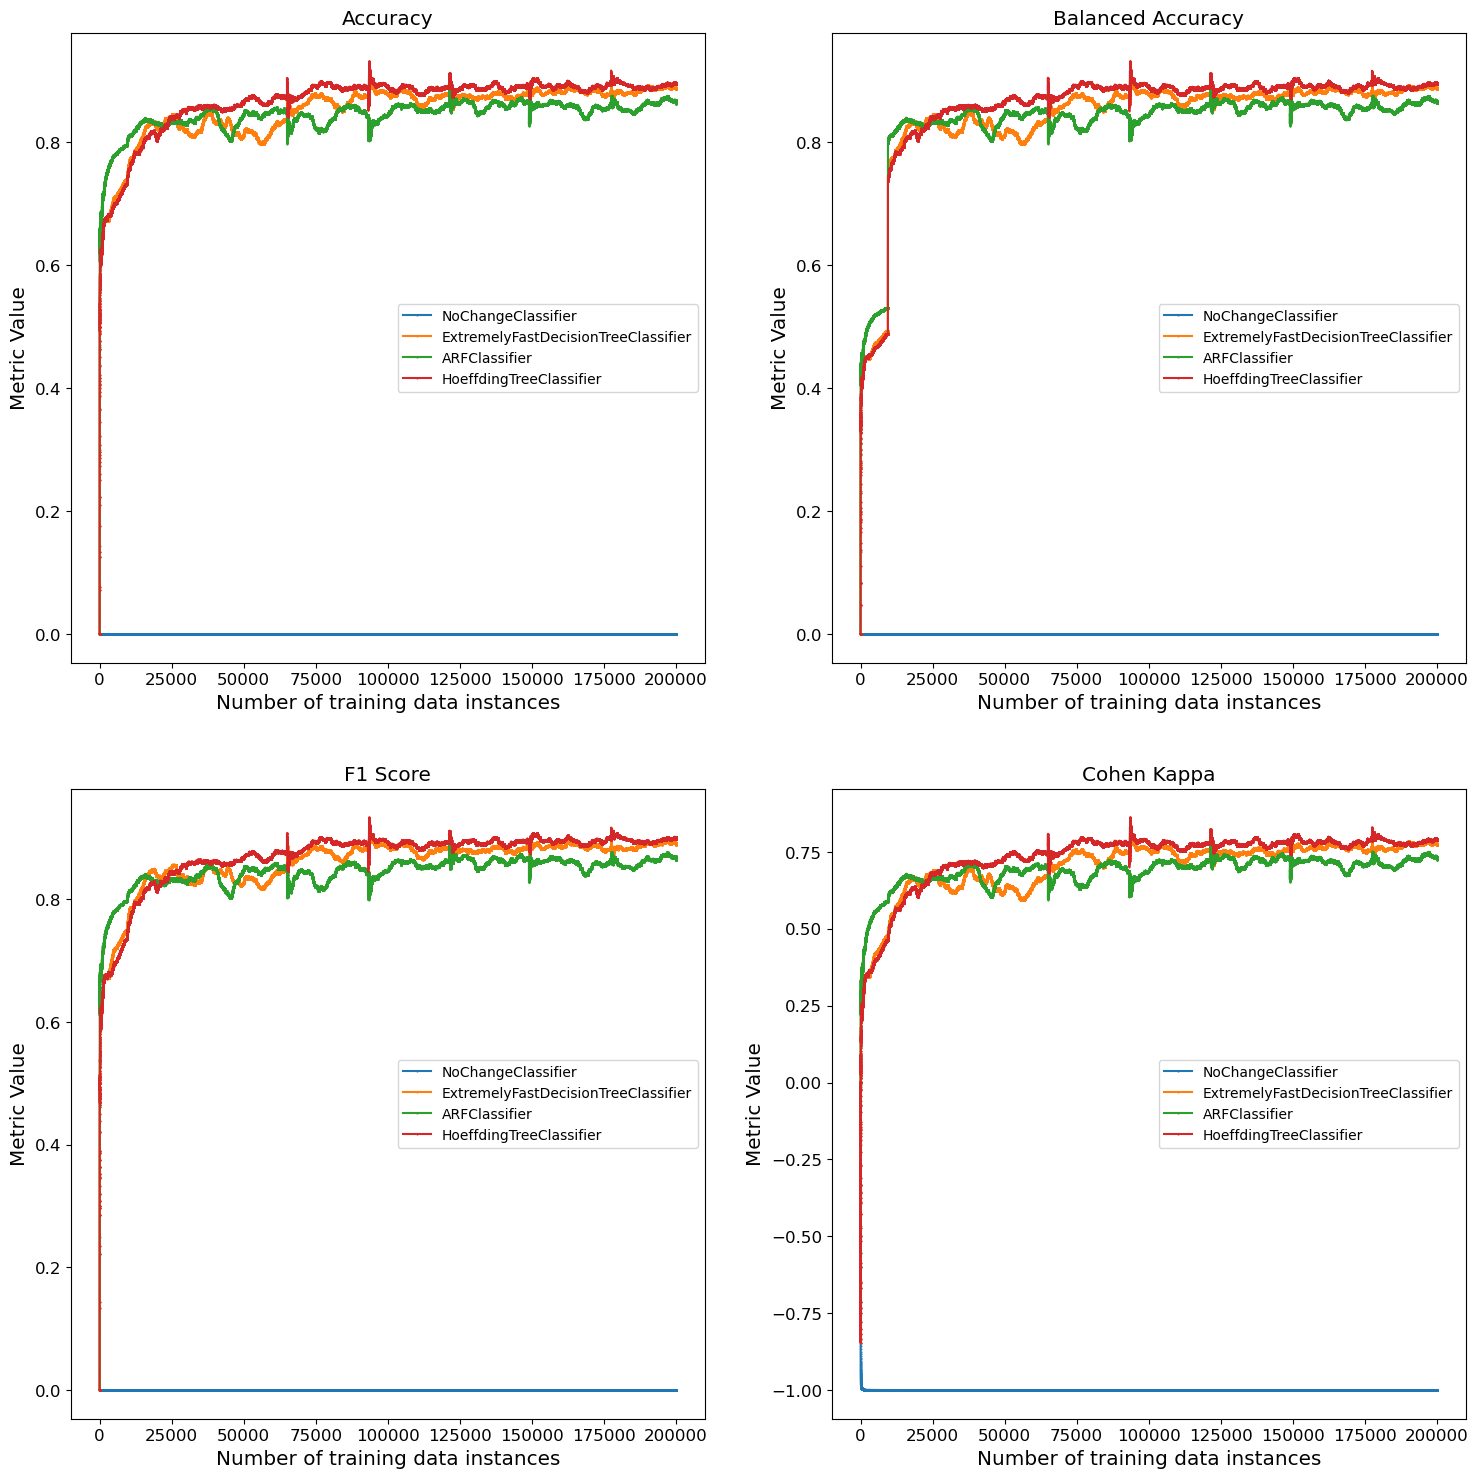

23/06/22 19:19:14 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 9286 milliseconds
23/06/22 19:19:25 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 10822 milliseconds
23/06/22 19:19:52 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 27748 milliseconds
23/06/22 19:21:00 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 68102 milliseconds


In [28]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'center right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

# Stream Miner - Case 4

In [2]:
init = InitializeCCD()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf
# spark.stop()

23/06/15 04:06:06 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_271321.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_271321.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_271321.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_271321.pkl'],
                            'caching_max_size' : 10000}, 
        "cluster-9e14-w-1" : {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_271321.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_271321.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_271321.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_271321.pkl'] ,
                            'caching_max_size' : 10000}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
        'caching_keys': ['caching_key'],
       'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
                        utils.Rolling(metrics.BalancedAccuracy(), 10000), 
                        utils.Rolling(metrics.F1(), 10000), 
                        utils.Rolling(metrics.CohenKappa(), 10000), 
                        utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20)), 
                       utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))]}

In [4]:
data_cols = [field.name for field in input_schema.fields][1:-2]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task, caching_keys = ["caching_key"])

In [7]:
data_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [5]:
output_schema = sm.output_schema
output_schema

StructType([StructField('training_time', FloatType(), False), StructField('n', IntegerType(), False), StructField('hostname', StringType(), False), StructField('hash', StringType(), False), StructField('model_name', StringType(), False), StructField('prediction', DoubleType(), False), StructField('R_Accuracy', FloatType(), False), StructField('R_BalancedAccuracy', FloatType(), False), StructField('R_F1', FloatType(), False), StructField('R_CohenKappa', FloatType(), False), StructField('TR_Accuracy', FloatType(), False), StructField('TR_BalancedAccuracy', FloatType(), False), StructField('TR_F1', FloatType(), False), StructField('TR_CohenKappa', FloatType(), False), StructField('model_name_2', StringType(), False), StructField('prediction_2', DoubleType(), False), StructField('R_Accuracy_2', FloatType(), False), StructField('R_BalancedAccuracy_2', FloatType(), False), StructField('R_F1_2', FloatType(), False), StructField('R_CohenKappa_2', FloatType(), False), StructField('TR_Accuracy_2

In [6]:
sm.transform_and_collect(sdf, "/user/hdfs/evaluation/sm/case4b", "/user/hdfs/evaluation/sm/case4b/chk")

23/06/15 04:06:28 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/15 04:06:28 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/15 04:19:31 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 782431 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
Keyboard

KeyboardInterrupt: 

In [11]:
output_schema = sm.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case4b")
pdf = df.toPandas()
pdf = pdf.sort_values(by=['n'])

print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

pdf = pdf[pdf["n"] <= 100000]

(324807, 46)
753.5438
(160798, 46)
753.5438


In [10]:
pdf[pdf["caching_key"] == "NO_CK"].hostname

304807    cluster-9e14-w-1
304808    cluster-9e14-w-1
304809    cluster-9e14-w-1
304810    cluster-9e14-w-1
304811    cluster-9e14-w-1
                ...       
324802    cluster-9e14-w-1
324803    cluster-9e14-w-1
324804    cluster-9e14-w-1
324805    cluster-9e14-w-1
324806    cluster-9e14-w-1
Name: hostname, Length: 20000, dtype: object

In [14]:
np.sum(pdf.caching_key == "NO_CK")

20000

In [7]:
all(pdf.R_Accuracy == pdf.R_Accuracy_2)

False

In [ ]:
all(pdf.R_Accuracy == pdf.R_Accuracy_2)

In [28]:
np.unique(pdf.model_name_4)

array(['NoChangeClassifier'], dtype=object)

In [14]:
pdf = pdf.dropna()

In [20]:
pdf.R_Accuracy_2.describe()

count    149542.000000
mean          0.996003
std           0.002804
min           0.986400
25%           0.995101
50%           0.997200
75%           0.997800
max           1.000000
Name: R_Accuracy_2, dtype: float64

In [24]:
all(pdf.R_CohenKappa_2 == pdf.R_CohenKappa_4)

True

In [21]:
pdf.R_Accuracy_3.describe()

count    149542.000000
mean          0.996003
std           0.002804
min           0.986400
25%           0.995101
50%           0.997200
75%           0.997800
max           1.000000
Name: R_Accuracy_3, dtype: float64

In [18]:
pdf = pdf.dropna()

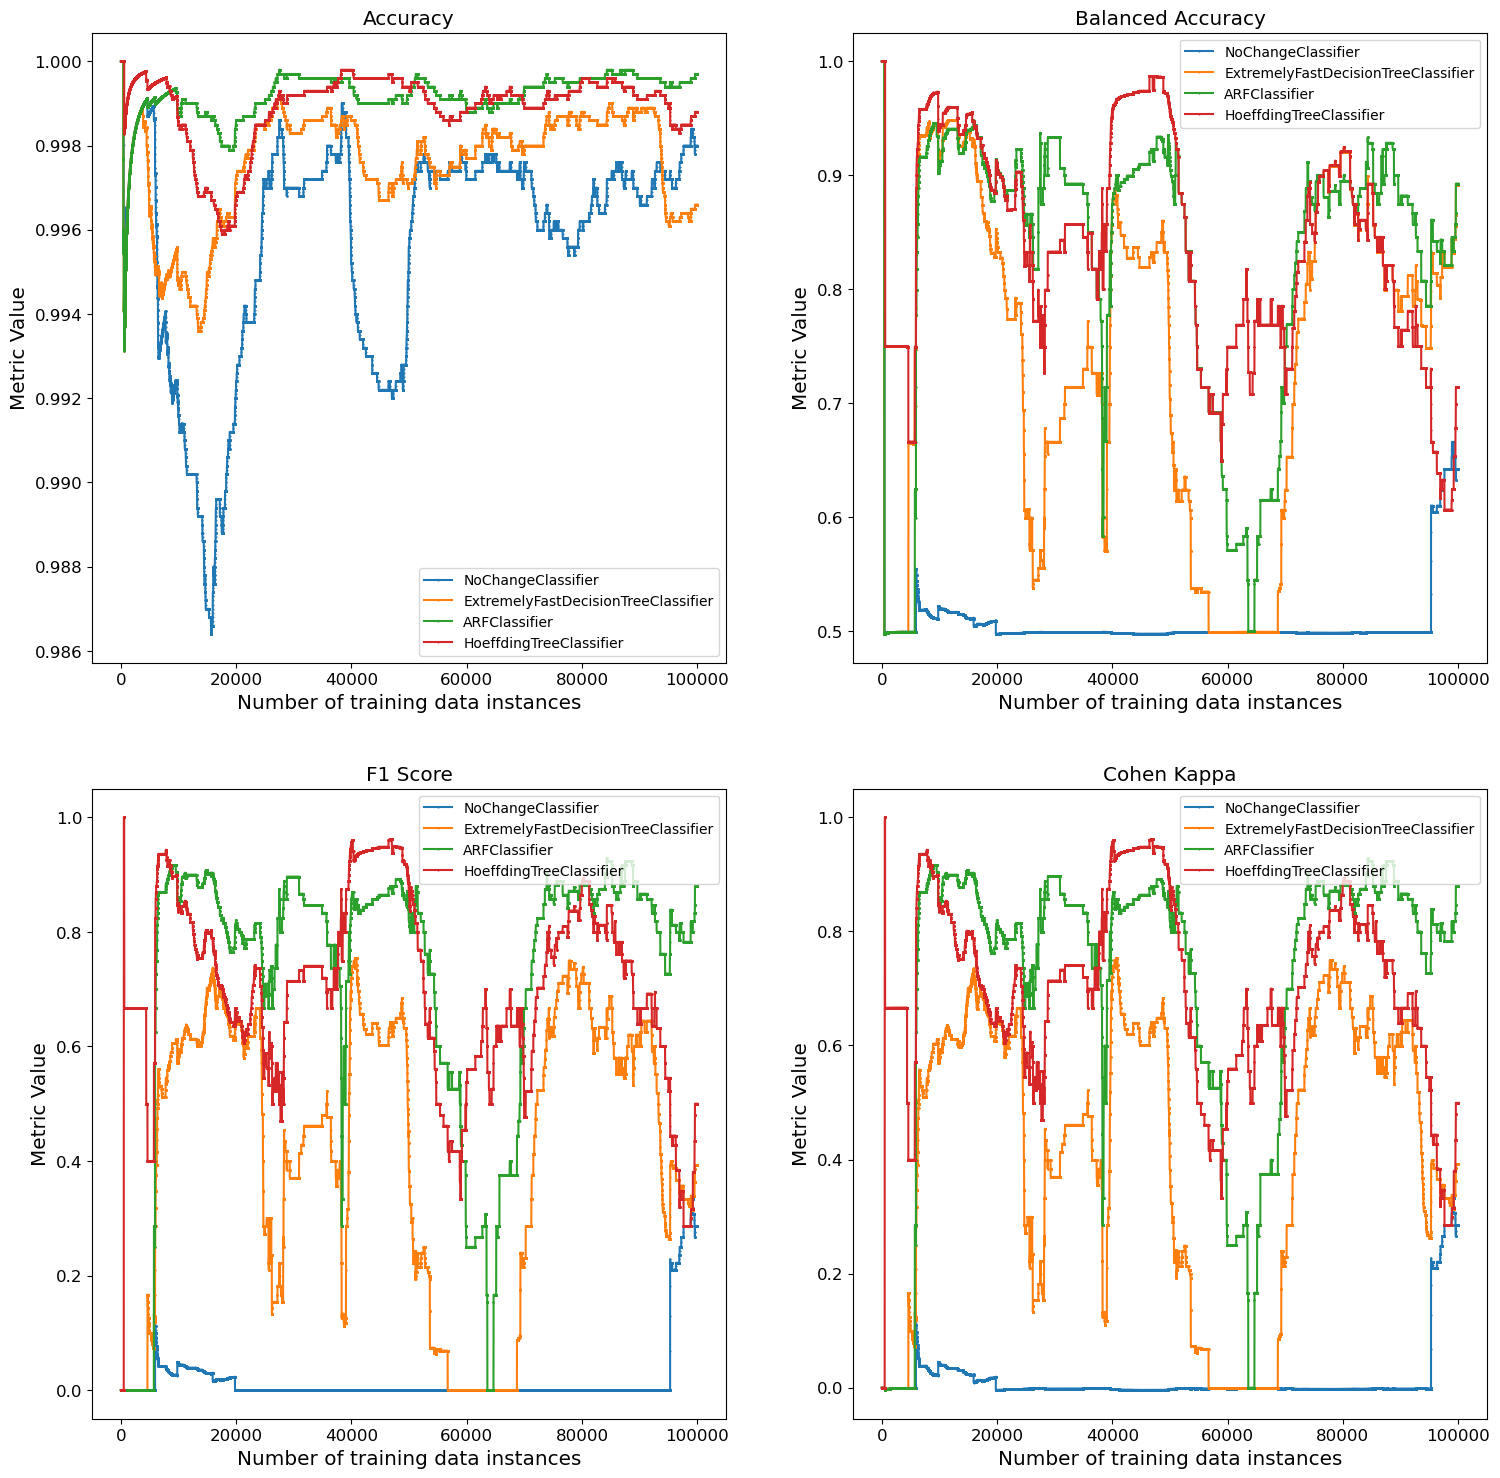

In [19]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'upper right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'upper right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'upper right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [15]:
aux = pdf.dropna()

In [16]:
aux.shape

(100000, 46)

In [17]:
pdf.shape

(107528, 46)

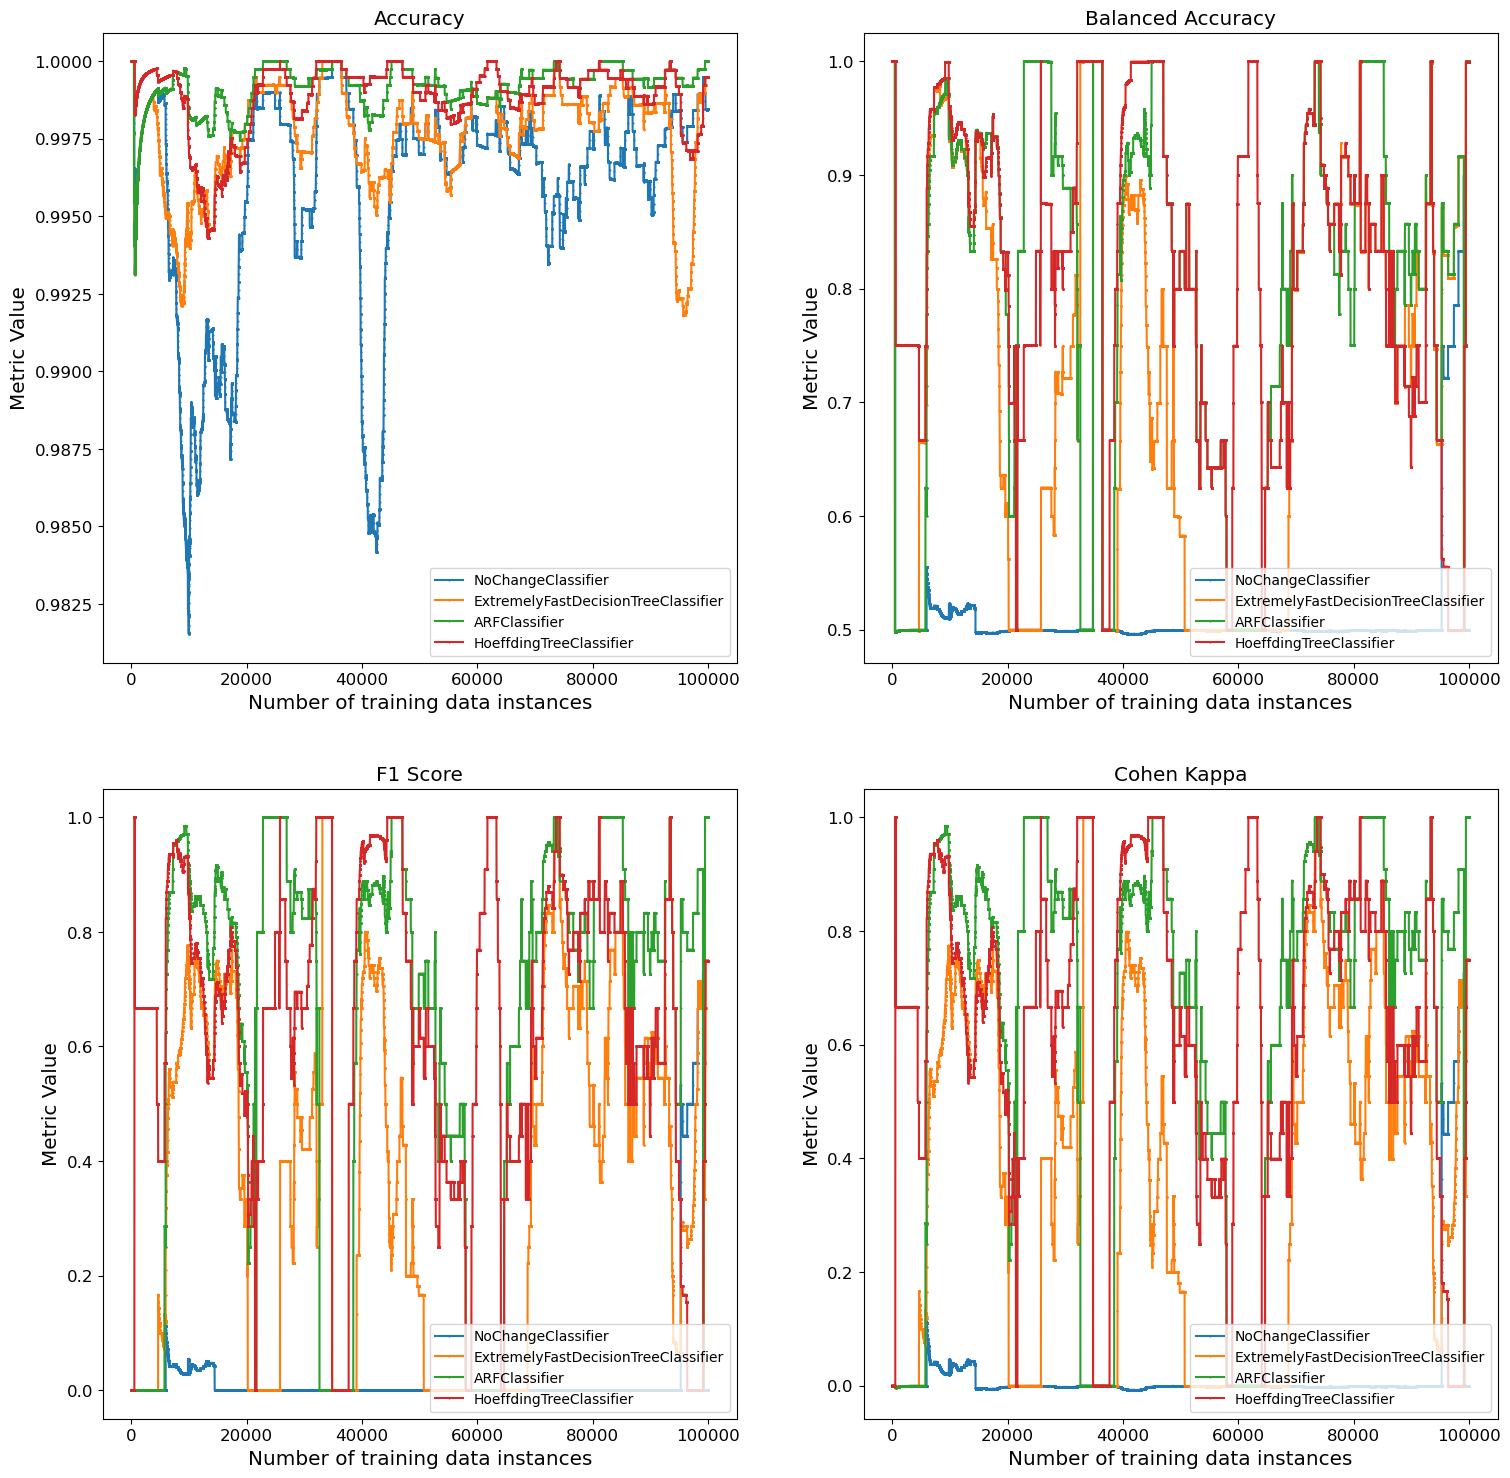

In [21]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf.n, pdf.TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf.n, pdf.TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

# Evaluator

In [3]:
# init ---

#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ["ARFClassifier_cluster-9e14-w-0_223667.pkl"] }, 
        "cluster-9e14-w-1" : {"pretrained_models": ["ARFClassifier_cluster-9e14-w-0_223667.pkl"] }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'metrics' : [metrics.BalancedAccuracy(), utils.Rolling(metrics.BalancedAccuracy(), 2000)]}
#DATA COLS
data_cols = ['V' + str(i) for i in range(1,29)]
data_cols.append('Amount') 

em = evaluator_master.EvaluatorMaster(data_cols, task)

In [5]:
em.transform_and_collect(sdf, "/user/hdfs/tescik", "/user/hdfs/tescik/chk")

23/06/14 14:00:02 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/14 14:00:03 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/14 14:00:57 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 55306 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardI

KeyboardInterrupt: 

# Predictor

In [3]:
# init ---

#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ["ARFClassifier_cluster-9e14-w-0_223667.pkl"] }, 
        "cluster-9e14-w-1" : {"pretrained_models": ["ARFClassifier_cluster-9e14-w-0_223667.pkl"] }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"]}
#DATA COLS
data_cols = ['V' + str(i) for i in range(1,29)]
data_cols.append('Amount') 

pm = predictor_master.PredictorMaster(data_cols, task)

In [5]:
pm.transform_and_collect(sdf, "/user/hdfs/tescik", "/user/hdfs/tescik/chk")

23/06/14 14:03:46 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/14 14:03:46 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/14 14:04:38 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 52038 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardI

KeyboardInterrupt: 

# Drift Detector

In [3]:
# init ---

#SET TASK
task = {"cluster-9e14-w-0": {"detectors": [drift.ADWIN()] }, 
        "cluster-9e14-w-1" : {"detectors": [drift.KSWIN()] }, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"]}
#DATA COLS
data_cols = ['V' + str(i) for i in range(1,29)]
data_cols.append('Amount') 

dm = drift_detector_master.DriftDetectorMaster(data_cols, task)

In [4]:
dm.transform_and_collect(sdf, "/user/hdfs/tescik", "/user/hdfs/tescik/chk")

23/06/14 14:13:02 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/14 14:13:03 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/14 14:13:39 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 37451 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardI

KeyboardInterrupt: 